# Домашнее задание к уроку 4

## 1. Импорт библиотек

In [1]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

## 2. Загрузка данных

In [3]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


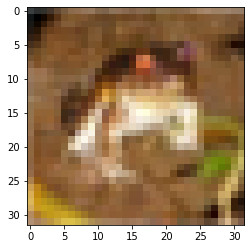

In [7]:
plt.imshow(x_train[0])

## 3. Нейронная сеть как на уроке

In [4]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_1.h5'

In [4]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)

In [6]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети, ответственные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [7]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5
391/391 [==============================] - 104s 264ms/step - loss: 1.9820 - accuracy: 0.2655 - val_loss: 1.8200 - val_accuracy: 0.3449
Epoch 2/5
391/391 [==============================] - 109s 279ms/step - loss: 1.7312 - accuracy: 0.3638 - val_loss: 1.5738 - val_accuracy: 0.4269
Epoch 3/5
391/391 [==============================] - 99s 252ms/step - loss: 1.6382 - accuracy: 0.4013 - val_loss: 1.5137 - val_accuracy: 0.4456
Epoch 4/5
391/391 [==============================] - 100s 254ms/step - loss: 1.5639 - accuracy: 0.4261 - val_loss: 1.4158 - val_accuracy: 0.4853
Epoch 5/5
391/391 [==============================] - 98s 250ms/step - loss: 1.5051 - accuracy: 0.4506 - val_loss: 1.3815 - val_accuracy: 0.5005


In [9]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как E:\Учеба\GeekBrains\Введение в нейронные сети\Урок 4\saved_models\keras_cifar10_trained_model.h5 


In [10]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 13ms/step - loss: 1.3815 - accuracy: 0.5005
Test loss: 1.3815184831619263
Test accuracy: 0.5005000233650208


## 4. Дополнительные параметры аугментации

Сделаем предположение, что если добавить дополнительные параметры аугментации (в ImageDataGenerator), то нейросеть сможет распознать большее количество изображений, похожих на исходные, и качество обучения нейросети улучшится.

In [ ]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_2.h5'

In [13]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5,
    brightness_range=(0.4, 0.6),
    shear_range=0.2,
    zoom_range=0.2)

In [14]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети, ответственные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [15]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5
391/391 [==============================] - 94s 237ms/step - loss: 2.3026 - accuracy: 0.0965 - val_loss: 2.3021 - val_accuracy: 0.1066
Epoch 2/5
391/391 [==============================] - 93s 236ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3021 - val_accuracy: 0.1065
Epoch 3/5
391/391 [==============================] - 94s 238ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3021 - val_accuracy: 0.1063
Epoch 4/5
391/391 [==============================] - 94s 240ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2.3021 - val_accuracy: 0.1066
Epoch 5/5
391/391 [==============================] - 98s 250ms/step - loss: 2.3026 - accuracy: 0.0959 - val_loss: 2.3021 - val_accuracy: 0.1068


In [17]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как E:\Учеба\GeekBrains\Введение в нейронные сети\Урок 4\saved_models\keras_cifar10_trained_model_2.h5 


In [18]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 13ms/step - loss: 2.3021 - accuracy: 0.1068
Test loss: 2.3021116256713867
Test accuracy: 0.10679999738931656


Наше предположение не оправдалось: качество обучения существенно ухудшилось, и теперь результат не сильно лучше, чем при случайном выборе ответа.

## 5. Изменение гиперпараметров нейросети

Сделаем предположение, что для улучшения работы нейросети можно увеличить количество фильтров. Тогда фильтры будут лучше характеризовать соответствующее изоображение и облегчать классификапцию.                                                                                                                    

In [20]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_3.h5'

In [21]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)

In [25]:
# конфигурирование слоев нейросети, ответственных за свертку и max-pooling
model = Sequential()

# слои нейросети, ответственные за свертку и max-pooling
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [26]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [27]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5
391/391 [==============================] - 206s 524ms/step - loss: 1.9297 - accuracy: 0.2928 - val_loss: 1.6075 - val_accuracy: 0.4210
Epoch 2/5
391/391 [==============================] - 205s 523ms/step - loss: 1.6366 - accuracy: 0.4024 - val_loss: 1.4477 - val_accuracy: 0.4727
Epoch 3/5
391/391 [==============================] - 205s 524ms/step - loss: 1.5152 - accuracy: 0.4483 - val_loss: 1.3201 - val_accuracy: 0.5273
Epoch 4/5
391/391 [==============================] - 207s 529ms/step - loss: 1.4386 - accuracy: 0.4823 - val_loss: 1.2503 - val_accuracy: 0.5483
Epoch 5/5
391/391 [==============================] - 205s 524ms/step - loss: 1.3692 - accuracy: 0.5085 - val_loss: 1.1791 - val_accuracy: 0.5817


In [9]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как E:\Учеба\GeekBrains\Введение в нейронные сети\Урок 4\saved_models\keras_cifar10_trained_model.h5 


In [10]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 13ms/step - loss: 1.3815 - accuracy: 0.5005
Test loss: 1.3815184831619263
Test accuracy: 0.5005000233650208


Точность работы нейросети не изменилась, поэтому не будем менять количество фильтров.

## 6. Изменение настроек слоев нейросети

Попробуем изменить параметры слоя conv-2d, уменьшив размер ядра до (2, 2). Поскольку размеры изображений небольшие, то было опасение, что при ядре (3, 3) мы теряем слишком много информации. Также уменьшим Dropout до 0.1, чтобы не терялось слишком много изображений из обучающего датасета.

In [50]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_1.h5'

In [51]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)

In [52]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети, ответственные за свертку и max-pooling
model.add(Conv2D(32, (2, 2), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [53]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [54]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5
391/391 [==============================] - 76s 193ms/step - loss: 2.0146 - accuracy: 0.2650 - val_loss: 1.7551 - val_accuracy: 0.3891
Epoch 2/5
391/391 [==============================] - 75s 191ms/step - loss: 1.7438 - accuracy: 0.3704 - val_loss: 1.6230 - val_accuracy: 0.4229
Epoch 3/5
391/391 [==============================] - 76s 194ms/step - loss: 1.6368 - accuracy: 0.4071 - val_loss: 1.5290 - val_accuracy: 0.4541
Epoch 4/5
391/391 [==============================] - 75s 191ms/step - loss: 1.5661 - accuracy: 0.4340 - val_loss: 1.4901 - val_accuracy: 0.4693
Epoch 5/5
391/391 [==============================] - 75s 191ms/step - loss: 1.5050 - accuracy: 0.4589 - val_loss: 1.3982 - val_accuracy: 0.5015


In [55]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как E:\Учеба\GeekBrains\Введение в нейронные сети\Урок 4\saved_models\keras_cifar10_trained_model_1.h5 


In [56]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.3982 - accuracy: 0.5015
Test loss: 1.398240566253662
Test accuracy: 0.5015000104904175


Обученная модель показала чуть более хорошие результаты, чем в исходном варианте сети. Оставим измененные параметры для следующей модели.

## 7. Изменение настроек функции оптимизации

Попробуем вместо RMSprop использовать функцию оптимизации Adam.

In [60]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_1.h5'

In [61]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)

In [62]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети, ответственные за свертку и max-pooling
model.add(Conv2D(32, (2, 2), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [63]:
# инициализация RMSprop optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [64]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5
391/391 [==============================] - 74s 188ms/step - loss: 1.9680 - accuracy: 0.2837 - val_loss: 1.6790 - val_accuracy: 0.4023
Epoch 2/5
391/391 [==============================] - 74s 188ms/step - loss: 1.7028 - accuracy: 0.3832 - val_loss: 1.5680 - val_accuracy: 0.4339
Epoch 3/5
391/391 [==============================] - 73s 187ms/step - loss: 1.6144 - accuracy: 0.4125 - val_loss: 1.4810 - val_accuracy: 0.4710
Epoch 4/5
391/391 [==============================] - 74s 187ms/step - loss: 1.5342 - accuracy: 0.4463 - val_loss: 1.3886 - val_accuracy: 0.5015
Epoch 5/5
391/391 [==============================] - 73s 186ms/step - loss: 1.4763 - accuracy: 0.4644 - val_loss: 1.3471 - val_accuracy: 0.5204


In [65]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как E:\Учеба\GeekBrains\Введение в нейронные сети\Урок 4\saved_models\keras_cifar10_trained_model_1.h5 


In [66]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.3471 - accuracy: 0.5204
Test loss: 1.3470852375030518
Test accuracy: 0.5203999876976013


Изменение функции оптимизации дало существенное улучшение точности сети.

## 7. Выводы

В результате проведенных экспериментов удалось улучшить accuracy на тестовых данных с 0.5005 до 0.5204.
Улучшение результов произошло при изменении следующих параметров:
1. Замена функции оптимизации с RMSprop на Adam.
2. Уменьшение размера ядра и dropout.
Вероятно, пункт 2 позволил улучшить результаты из-за того, что изображения в датасете небольшого размера и с низким разрешением, и сильная агрегация пикселей на изображении приведет к невозможности распознать изображение.

Ухудшение accuracy произошло при иследующих изменениях:
1. Дополнительные параметры аугментации;
2. Увеличение количества фильтров.

## 8. Работа с другими образцами данных

Рассмотрим другие образцы данных вместо Cifar10.

### 8.1. Массив данных MNIST

Массив данных MNIST представляет собой рукописные изображения цифр. Особенностями этих изображений является то, что:
1. Информативными является небольшое количество пикселей изображений, остальные представляют из себя просто фон;
2. Для целей классификации было бы достаточно, чтобы изображение было бинарным: значение 0 в пикселях, соответствующих написанным фрагментам цифр, и 1 - в "пустых" пикселях. Градации серого цвета практически не несут никакой пользы для классификации и только усложняют ее.

Исходя из этих особенностей, можно попробовать внести следующие изменения в нейронную сеть:
1. Добавить предобработку данных, преобразовывающую изображения в бинарный вид (для упрощения дальнейшей обработки);
2. Уменьшить количество применяемых фильтров (поскольку изображения более простые, то для их классификации должно хватить меньшего количества фильтров);
3. Из ImageDataGenerator убрать параметр horizontal_flip, поскольку отражение цифры по горизонтали лишает картинку смысла.

### 8.2. Массив данных CIFAR100 

Основное отличие массива Cifar100 от массива Cifar10 - в количестве выходных классов для изображений (100 против 10).
Соответственно, нужно будет поменять количество классов на выходе работы сети (num_classes). 

Далее, можно предположить, что структура сети должна стать более сложной, чтобы обеспечить распознавание изображений по более тонким отличиям. Это может быть сделано за счет:
- большего количества фильтров;
- большего количества слоев всех типов (conv2D, pooling, Dense);
- большего количества нейронов в слоях.

### 8.3. Массив данных IMAGENET

Если Cifar10 представляет собой небольшой массив с маленькими изображениями (низкого разрешения), то ImageNet - огромный массив с более детализированными изображениями. Поэтому вероятны следующие изменения в нейронной сети:
1. Большее количество классов на выходе;
2. Больший размер ядер свертки и шага;
3. Большее количество признаков, чтобы сделать возможным распознавание большого количества классов.